In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel, wilcoxon, shapiro


# Dane inflacji "studenckiej"
#open data from file data/inflacja_lata.csv
df_studencka = pd.read_csv('data/inflacja_studencka.csv', sep=',')



# Dane inflacji oficjalnej
#open data from file data/inflacja_oficjalna.csv
df_oficjalna = pd.read_csv('data/inflacja_lata.csv', sep=',')


# Filtrujemy dane oficjalne, aby odpowiadały latom danych studenckich
df_oficjalna_filtered = df_oficjalna[df_oficjalna['rok'].isin(df_studencka['rok'])]

# Sprawdzamy czy lata się zgadzają
if not np.array_equal(df_studencka['rok'], df_oficjalna_filtered['rok']):
    raise ValueError("Lata w danych studenckich i oficjalnych nie zgadzają się")

# Przygotowujemy dane
X = df_studencka['wartosc'].values
Y = df_oficjalna_filtered['wartosc'].values


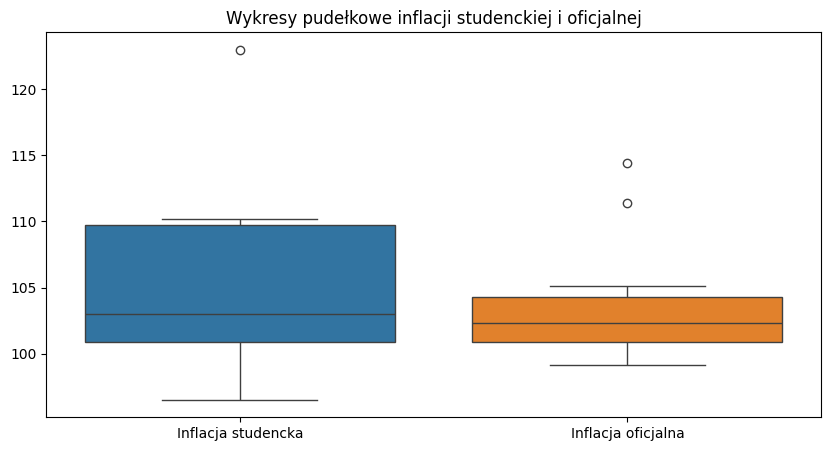

In [2]:

# Krok 1: Wykresy pudełkowe inflacji „studenckiej” i oficjalnej
plt.figure(figsize=(10, 5))
sns.boxplot(data=[X, Y])
plt.xticks([0, 1], ['Inflacja studencka', 'Inflacja oficjalna'])
plt.title('Wykresy pudełkowe inflacji studenckiej i oficjalnej')
plt.show()


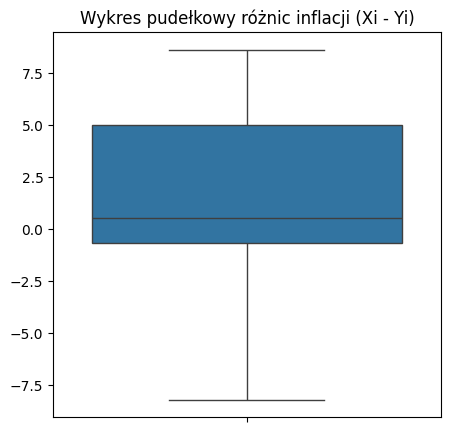

In [3]:
# Krok 2: Wykres pudełkowy różnic Xi - Yi
D = X - Y
plt.figure(figsize=(5, 5))
sns.boxplot(data=D)
plt.title('Wykres pudełkowy różnic inflacji (Xi - Yi)')
plt.show()


In [4]:
# Krok 3: Test hipotezy statystycznej
# Test normalności rozkładu różnic
# Test normalności rozkładu różnic
shapiro_test_D = shapiro(D)

if shapiro_test_D.pvalue > 0.05:
    stat, p_value = ttest_rel(X, Y, alternative='less')
    test_name = 'Paired t-test'
    # Hipotezy dla Paired t-test
    H0 = "Inflacja studencka jest większa od inflacji oficjalnej"
    H1 = "Inflacja studencka nie jest większa od inflacji oficjalnej"
else:
    stat, p_value = wilcoxon(X, Y, alternative='less')
    test_name = 'Wilcoxon test'
    # Hipotezy dla Wilcoxon test
    H0 = "Inflacja studencka jest większa od inflacji oficjalnej"
    H1 = "Inflacja studencka nie jest większa od inflacji oficjalnej"

# Wyniki testu
alpha = 0.05
print(f"Wyniki {test_name}: statystyka={stat:.4f}, p-wartość={p_value:.4f}")

if p_value < alpha:
    print(f"Odrzucamy hipotezę zerową: {H0}")
    print(f"Przyjmujemy hipotezę alternatywną: {H1}")
else:
    print(f"Nie ma podstaw do odrzucenia hipotezy zerowej: {H0}")


Wyniki Paired t-test: statystyka=0.7925, p-wartość=0.7783
Nie ma podstaw do odrzucenia hipotezy zerowej: Inflacja studencka jest większa od inflacji oficjalnej
